In [44]:
#importing
import os
import numpy as np
import pandas as pd
from scipy.stats import triang
from scipy.stats import norm
from scipy.stats import poisson
import numpy_financial as npf
print("all libraries are loaded!")

all libraries are loaded!


In [45]:
df = pd.read_csv("q1_input_cost.csv")
df

,year,Construction Cost,Labor - Annual,O&M
0,0,0,0,0
1,1,-50000000,-473500,0
2,2,-50000000,-473500,-790000
3,3,-50000000,-473500,-1580000
4,4,0,-473500,-2370000
5,5,0,-473500,-2370000
6,6,0,-473500,-2370000
7,7,0,-473500,-2370000
8,8,0,-473500,-2370000
9,9,0,-473500,-2370000


In [46]:
fee_MF = 10.00 #USD/spot
spc_MF_min = 0
spc_MF_max = 5000*0.80
spc_MF = np.mean([spc_MF_min,spc_MF_max]) #Spot per Cycle with MIN & MAX
cpd_MF_min = 0
cpd_MF_max = 3
cpd_MF = np.mean([cpd_MF_min,cpd_MF_max]) #cycle per day
py_MF = 261 #How many working days are there in a year
B_MF = fee_MF*spc_MF*cpd_MF*py_MF
fee_EV = 7.50 #USD/spot
spc_EV_min = 0
spc_EV_max = 5000*0.80
spc_EV = np.mean([spc_EV_min,spc_EV_max]) #Spot per Cycle with MIN & MAX
cpe_EV_min = 0
cpe_EV_max = 2
cpe_EV = np.mean([cpe_EV_min,cpe_EV_max]) #cycle per event
py_EV = 135 #How many events are there in a year
B_EV = fee_EV*spc_EV*cpe_EV*py_EV
print("B_MF is "+"${0:,.2f}".format(B_MF))
print("B_EV is "+"${0:,.2f}".format(B_EV))
B_MF0 = B_MF
B_EV0 = B_EV

B_MF is $7,830,000.00
B_EV is $2,025,000.00


In [47]:
df["B_MF"]=B_MF
df["B_EV"]=B_EV
df.at[0,"B_MF"]=0
df.at[0,"B_EV"]=0
df.at[1,"B_MF"]=0
df.at[1,"B_EV"]=0
df.at[2,"B_MF"]=B_MF*1/3
df.at[2,"B_EV"]=B_EV*1/3
df.at[3,"B_MF"]=B_MF*2/3
df.at[3,"B_EV"]=B_EV*2/3
df["Net"] = df.drop('year', axis=1).sum(axis=1)
df.style.format('${0:,.2f}')

,year,Construction Cost,Labor - Annual,O&M,B_MF,B_EV,Net
0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
1,$1.00,"$-50,000,000.00","$-473,500.00",$0.00,$0.00,$0.00,"$-50,473,500.00"
2,$2.00,"$-50,000,000.00","$-473,500.00","$-790,000.00","$2,610,000.00","$675,000.00","$-47,978,500.00"
3,$3.00,"$-50,000,000.00","$-473,500.00","$-1,580,000.00","$5,220,000.00","$1,350,000.00","$-45,483,500.00"
4,$4.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
5,$5.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
6,$6.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
7,$7.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
8,$8.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"
9,$9.00,$0.00,"$-473,500.00","$-2,370,000.00","$7,830,000.00","$2,025,000.00","$7,011,500.00"


In [48]:
net_val = df["Net"].to_numpy()
rate_i = 0.07
#Printing NPV Values
print("NPV value with rate ", rate_i, " is: ", "${0:,.2f}".format(npf.npv(rate_i, net_val)))

NPV value with rate  0.07  is:  $-95,360,409.81


In [49]:
column_names = ["iteration", "NPV"]
df_sim = pd.DataFrame(columns = column_names)
for iter in range(1000): #simulation with 1000 iteration
  #print(iter)
  spc_MF_mean = np.mean([spc_MF_min,spc_MF_max])
  spc_MF_sd = (spc_MF_max-spc_MF_min)/4
  spc_MF = norm.rvs(loc=spc_MF_mean,scale=spc_MF_sd) #Spot per Cycle
  cpd_MF_mean = np.mean([cpd_MF_min,cpd_MF_max])
  cpd_MF_sd = (cpd_MF_max-cpd_MF_min)/4
  cpd_MF = norm.rvs(loc=cpd_MF_mean,scale=cpd_MF_sd) #cycle per day
  B_MF = fee_MF*spc_MF*cpd_MF*py_MF
  spc_EV_mean = np.mean([spc_EV_min,spc_EV_max])
  spc_EV_sd = (spc_EV_max-spc_EV_min)/4
  spc_EV = norm.rvs(loc=spc_EV_mean,scale=spc_EV_sd) #Spot per Cycle
  cpe_EV_mean = np.mean([cpe_EV_min,cpe_EV_max])
  cpe_EV_sd = (cpe_EV_max-cpe_EV_min)/4
  cpe_EV = norm.rvs(loc=cpe_EV_mean,scale=cpe_EV_sd) #cycle per event
  B_EV = fee_EV*spc_EV*cpe_EV*py_EV
  df_temp = df
  df_temp["B_MF"]=B_MF
  df_temp["B_EV"]=B_EV
  df_temp.at[0,"B_MF"]=0
  df_temp.at[0,"B_EV"]=0
  df_temp.at[1,"B_MF"]=0
  df_temp.at[1,"B_EV"]=0
  df_temp.at[2,"B_MF"]=B_MF*1/3
  df_temp.at[2,"B_EV"]=B_EV*1/3
  df_temp.at[3,"B_MF"]=B_MF*2/3
  df_temp.at[3,"B_EV"]=B_EV*2/3
  df_temp["Net"] = df_temp.drop('year', axis=1).sum(axis=1)
  net_val = df_temp["Net"].to_numpy()
  NPV = npf.npv(rate_i, net_val)
  #keep track
  df_sim.at[iter,"iteration"] = iter
  df_sim.at[iter,"NPV"] = NPV
print(df_sim.describe())
print(df_sim.max())
print(df_sim.min())

        iteration           NPV
count        1000  1.000000e+03
unique       1000  1.000000e+03
top             0 -9.581466e+10
freq            1  1.000000e+00
iteration                 999
NPV         -202880027.713913
dtype: object
iteration                     0
NPV         -95984546383.275772
dtype: object


In [50]:
df_sim.head().style.format('${0:,.2f}')

,iteration,NPV
0,$0.00,"$-202,880,027.71"
1,$1.00,"$-278,531,799.39"
2,$2.00,"$-379,694,930.64"
3,$3.00,"$-491,625,561.72"
4,$4.00,"$-600,211,044.33"


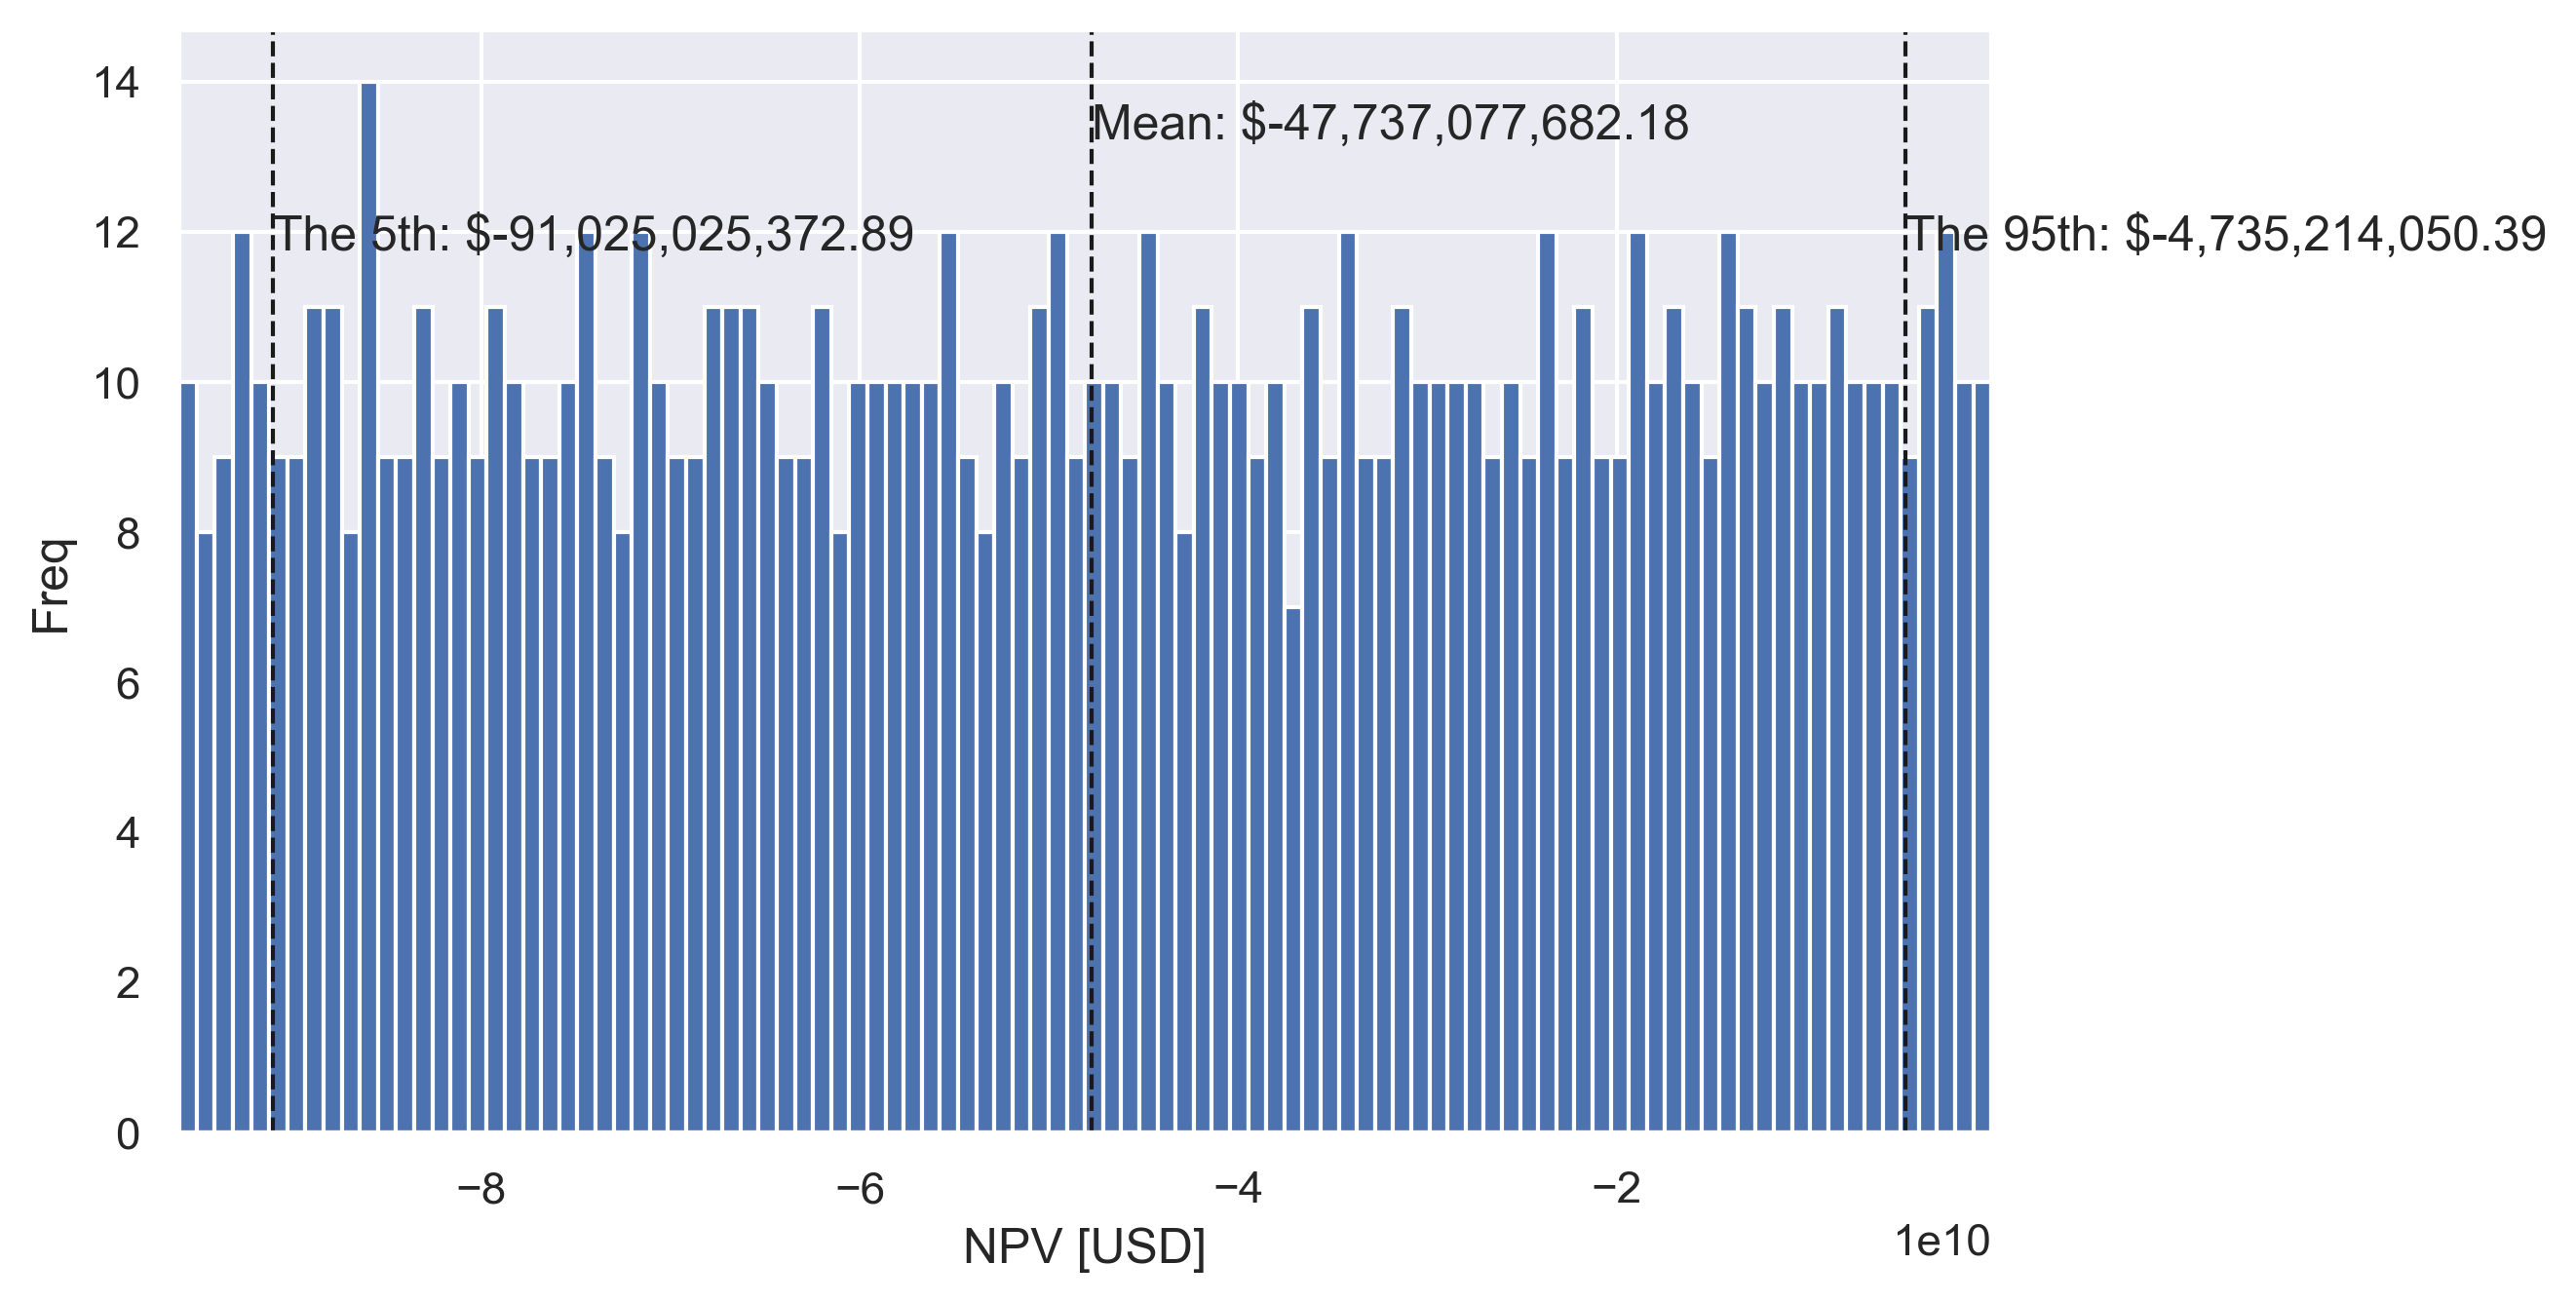

(-19359213298.826, -9781046663.27]      106
(-9781046663.27, -202880027.714]        103
(-86406379747.72, -76828213112.163]     101
(-57671879841.051, -48093713205.495]    100
(-76828213112.163, -67250046476.607]     99
(-67250046476.607, -57671879841.051]     99
(-48093713205.495, -38515546569.939]     99
(-38515546569.939, -28937379934.382]     98
(-28937379934.382, -19359213298.826]     98
(-96080328049.632, -86406379747.72]      97
Name: NPV, dtype: int64


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)

sns.set()

fig, ax = plt.subplots(figsize=[8,5],dpi=300)
ax.set_xlim([df_sim['NPV'].min(),df_sim['NPV'].max()])

_ = plt.hist(df_sim['NPV'], bins =100)
_ = plt.xlabel('NPV [USD]')
_ = plt.ylabel('Freq')

ze,max_y = plt.ylim()

plt.axvline(df_sim['NPV'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].mean(),max_y*0.9, 'Mean: ${0:,.2f}'.format(df_sim['NPV'].mean()))

plt.axvline(df_sim['NPV'].quantile(0.95), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].quantile(0.95),max_y*0.8, 'The 95th: ${0:,.2f}'.format(df_sim['NPV'].quantile(0.95)))

plt.axvline(df_sim['NPV'].quantile(0.05), color='k', linestyle='dashed', linewidth=1)
plt.text(df_sim['NPV'].quantile(0.05),max_y*0.8, 'The 5th: ${0:,.2f}'.format(df_sim['NPV'].quantile(0.05)))

plt.savefig('histogram_npv_sim.png')
plt.show()

print(df_sim['NPV'].value_counts(bins=10))